# Project : Milestone 2 (Chowdhury_MdIrteza)

## Loan_Predictor_ML

## Introduction 🙌

Companies aim to automate the real-time loan qualification process by utilizing customer-provided information from online application forms. The development of machine learning models is anticipated to aid in predicting loan approval, speed up the decision making process to determine applicant eligibility for loans.
* Analyze customer data provided in data set (EDA)
* Building different ML models that can predict loan approval

#### ML MODALs used in this project are :
    * Logistic Regration
    * Decision Tree 
    * Random Forest
    * K-Nearest Neighbour(KKN)

 ➡️ Data Source : https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
 
 External Sources used to learn : Kaggle , W3School , Lectures and Youtube

## Data Dictionary:
    * Loan_ID : Loan Reference Number ( Unique ID) 
    * Gender  : Applicant gender (Male or Female)
    * Married : Applicant marital status (Married or not married)
    * Dependents: Number of family members
    * Education : Applicant education/qualification (graduate or not graduate)
    * Self_Employed: Applicant employment status (yes for self-employed, no for employed/others)
    * Applicant Income:	Applicant's monthly salary/income
    * Coapplicant Income: Additional applicant's monthly salary/income
    * LoanAmount : Loan amount
    * Loan_Amount_Term : The loan's repayment period (in days)
    * Credit_History : Records of previous credit history ( o BAD ,1 Good )
    * Property_Area : The location of property ( Rural/Semiurban/Urban)
    * Loan_Status : ( Y: Accepted , N: Not accepted )

#### Importing All Required Libraries

In [716]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

In [717]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [718]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Reading and Explaring the DataSet:

In [719]:
#Importing Data 
df = pd.read_csv('loan_data_set.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [720]:
df.shape

(614, 13)

In [721]:
#Loan_ID
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

➡️ The dateset has 614 unque ID

In [722]:
#Gender
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

In [723]:
import matplotlib.pyplot as plt

# To Get a list of all available colormaps
colormaps = plt.colormaps()

# Print the list of colormaps
print(colormaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

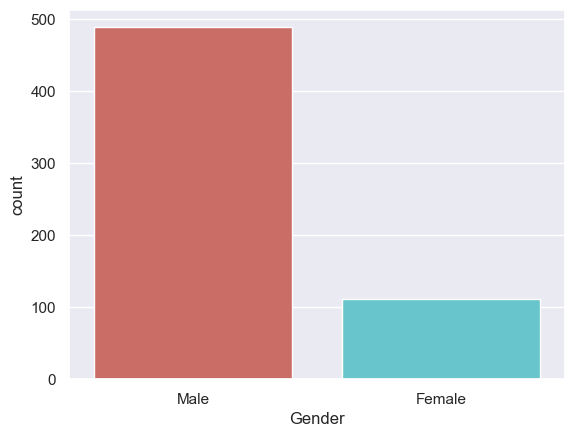

In [724]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [725]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


➡️The dateset shows that the number of male applicants is higher compared to female and it also has some missing values in this column.

In [726]:
#Married
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

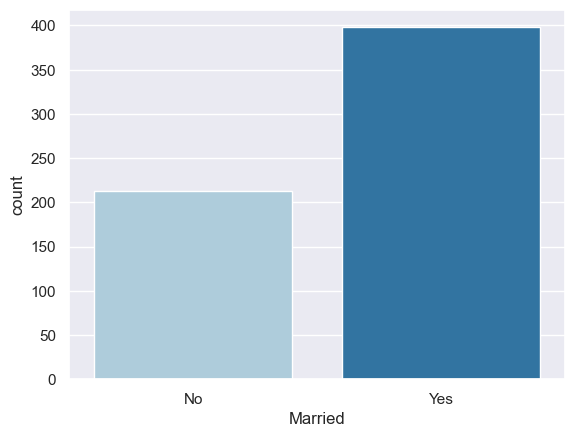

In [727]:
sns.countplot(x="Married" , data=df , palette="Paired")
plt.show

➡️ The number of applicants that has been married is higher compared to applicants that has not married. It also can be seen there are some number of missing values in this column

In [728]:
countMarried = len(df[df.Married == "Yes"])
countNotMarried = len(df[df.Married == "No"])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [729]:
#EDUCATION
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

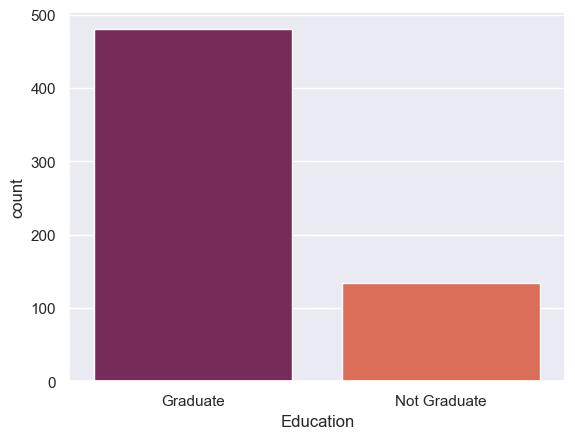

In [730]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [731]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


In [732]:
#Self_Emoloyed
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

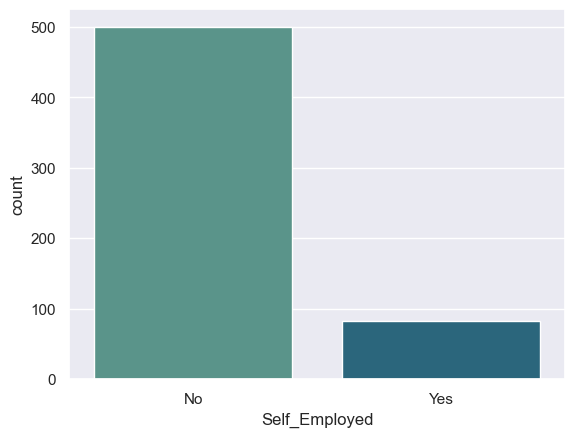

In [733]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [734]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [735]:
#CREDIT_HISTORY
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

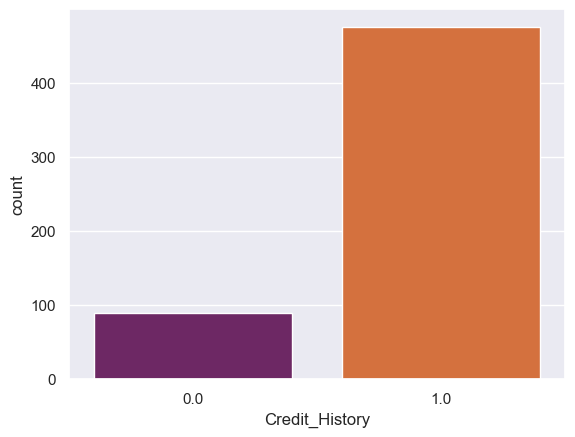

In [736]:
sns.countplot(x="Credit_History", data=df, palette="inferno")
plt.show()

In [737]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])
print('Good:',count1)
print("Bad:", count0)
print("Missiong:",countNull)
print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Good: 475
Bad: 89
Missiong: 50
Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


➡️ Number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

In [738]:
#Property Area
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

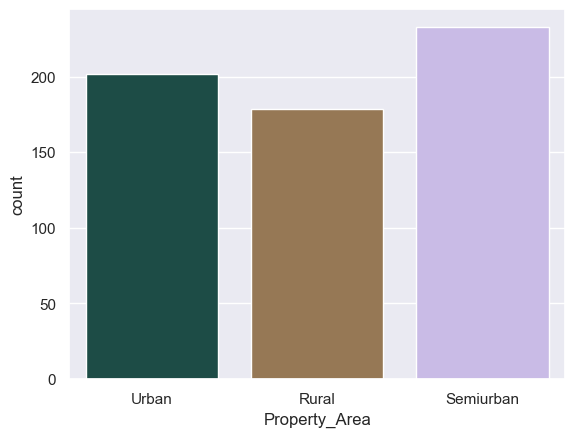

In [739]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [740]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


➡️ This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

In [741]:
#Loan Status
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

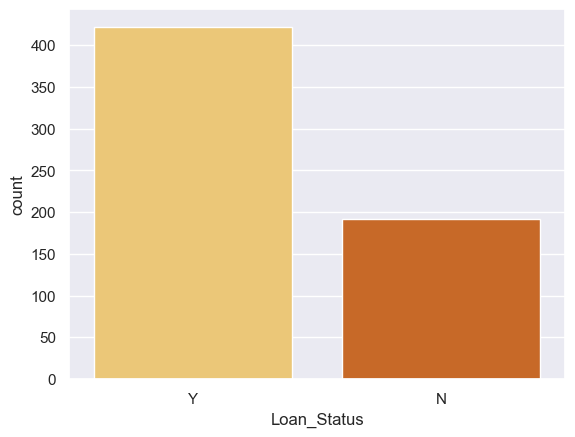

In [742]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [743]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


➡️The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

In [744]:
# Loan Amount Term
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

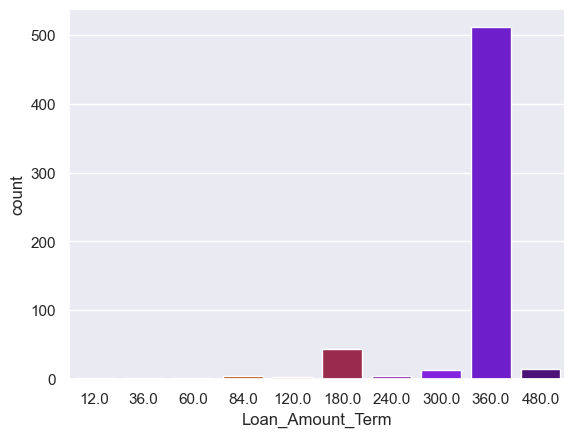

In [745]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="gnuplot_r")
plt.show()

In [746]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


➡️ From the results, the 360 days loan duration is the most popular compared to others.

### EXPLORING_Numerical Variable 
The second variable that I will explore is Numerical Veriable

In [747]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Distribution of Numerical Variable
Showing the distribution of numerical variable using violin plot and box plot.

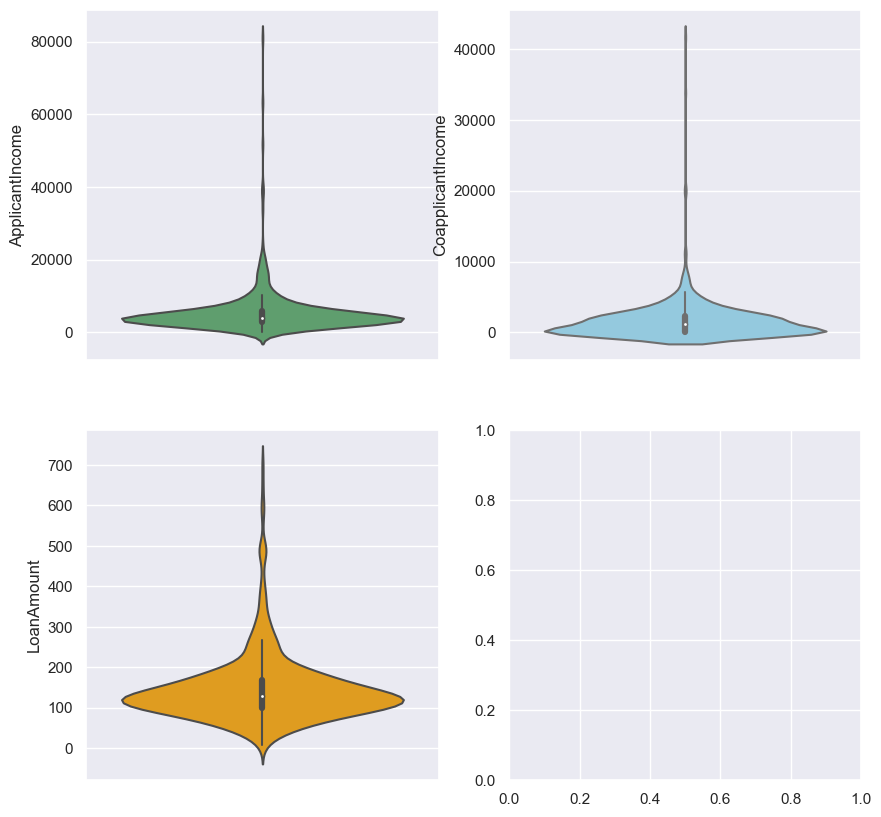

In [748]:
#Violin_Plot
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='g')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

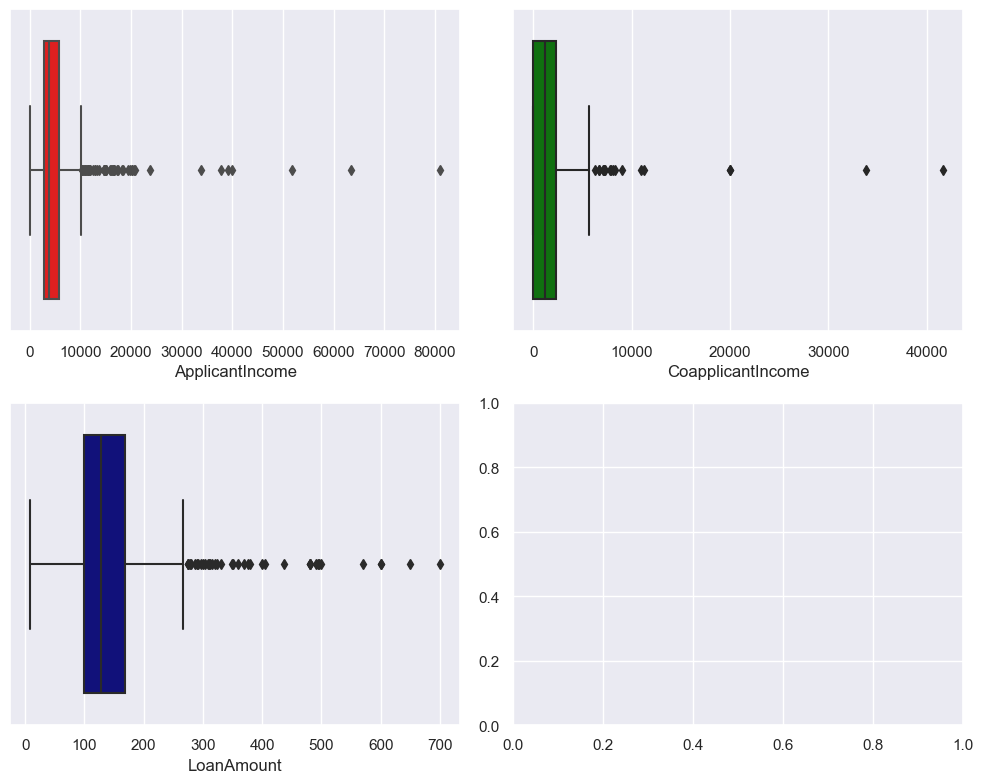

In [749]:
import seaborn as sns
import matplotlib.pyplot as plt
#BOX_PLoT 

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, x="ApplicantIncome", ax=axs[0, 0], color='red')
sns.boxplot(data=df, x="CoapplicantIncome", ax=axs[0, 1], color='green')
sns.boxplot(data=df, x="LoanAmount", ax=axs[1, 0], color='darkblue')


plt.tight_layout()

plt.show()

➡️ The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both Box and violin plot).
➡️ The distribution of Loan Amount Term is negativly skewed and it has outliers.

### This section will show additional exploration from each variables. The additional exploration are:

Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)

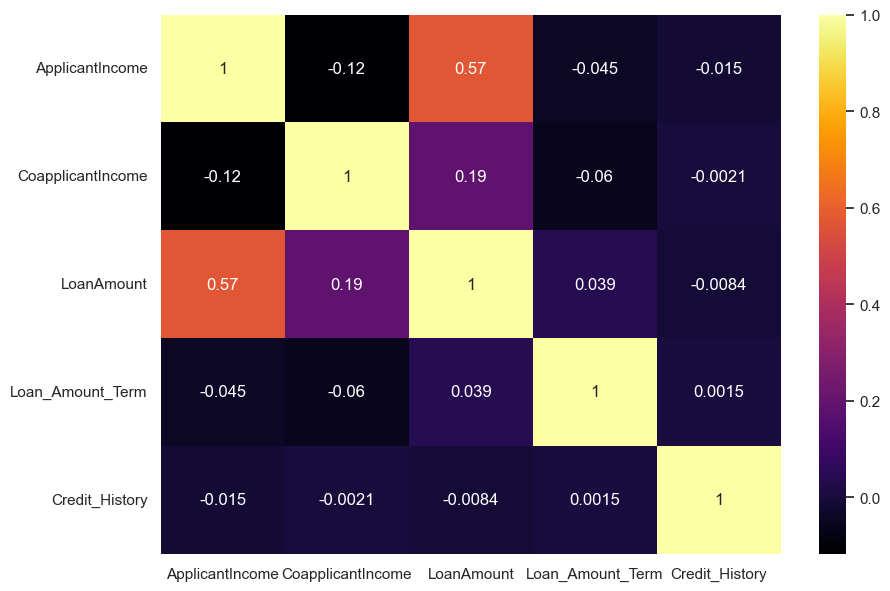

In [750]:
import pandas as pd

numeric_df = df.select_dtypes(include=['float64', 'int64'])

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno')
plt.show()

➡️ There is positive correlation between Loan Amount and Applicant Income

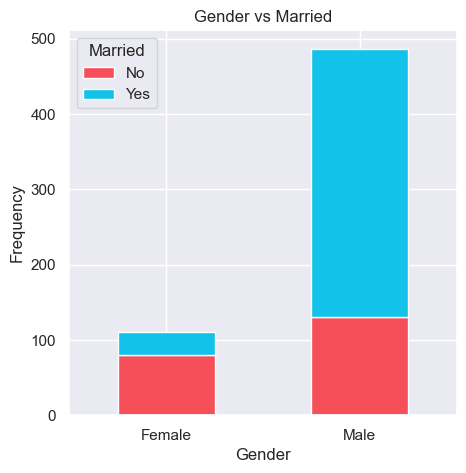

In [751]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

➡️ Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

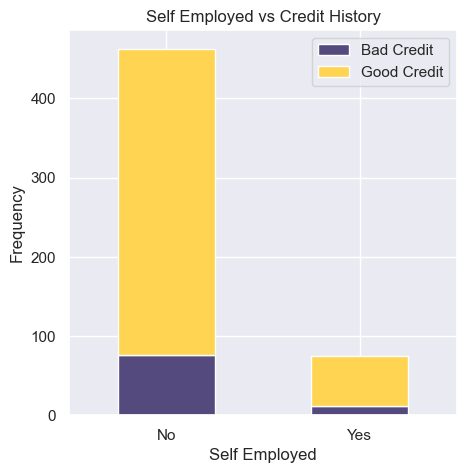

In [752]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

➡️ Most not self employed applicants have good credit compared to self employed applicants.

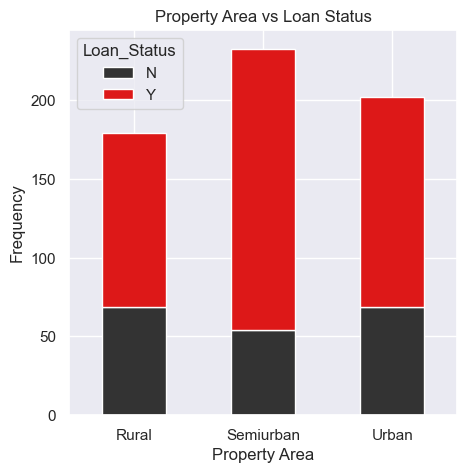

In [753]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

➡️ Most of loan that got accepted has property in Semiurban compared to Urban and Rural

In [754]:
#Categorical with Numerical

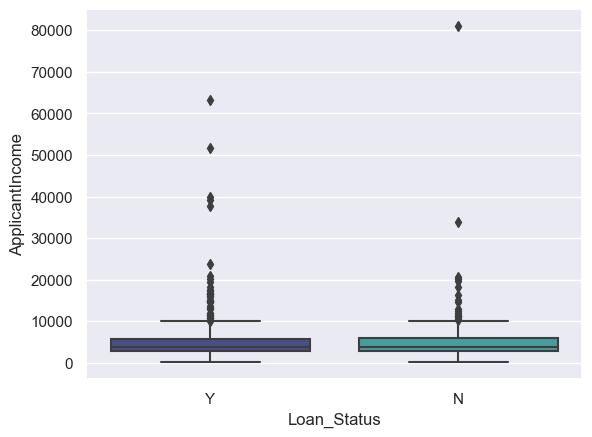

In [755]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

➡️It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

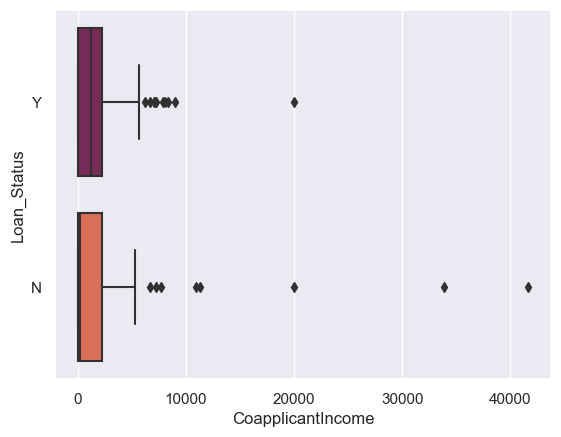

In [756]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

 ➡️it's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

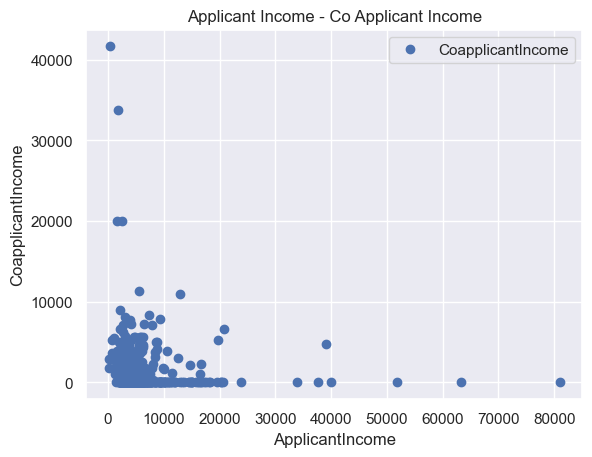

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [757]:
# Numerical with Numerical  
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

➡️There is negative correlation between Applicant income and Co Applicant Income.

➡️The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

## Missing value imputation and Data Preparation

In [758]:
# check for missing values in each variable
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

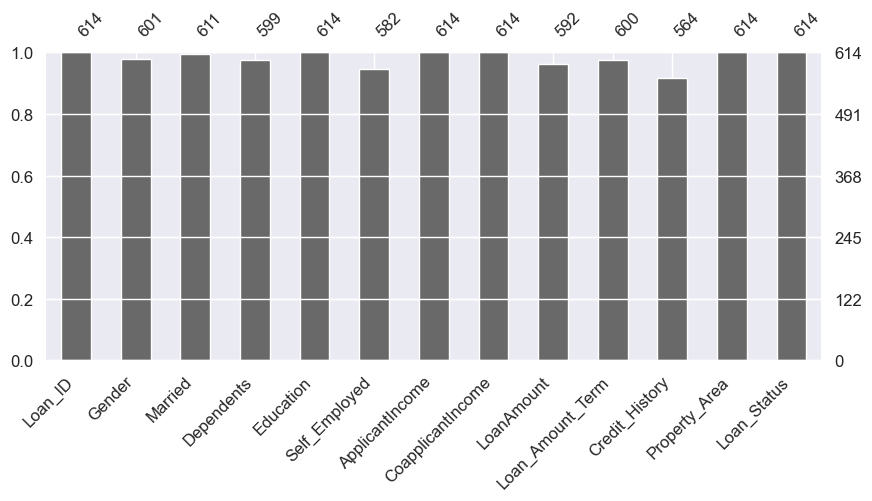

In [759]:
plt.figure(figsize = (22, 4))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

 ➡️Previous step the null values has been explored for Categorical Variables. In this section, the null values has been explored for all variables in the dataset.

#### Drop Unecessary Variables 
In this section dropping unecessary variables

In [760]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [761]:
df = df.drop(['Loan_ID'], axis = 1)

In [762]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Data Imputation
Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values

In [763]:
# impute all missing values in all the features
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
# Numerical variable :
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [764]:
# Checking if there are any missing values left
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [765]:
df.describe(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


In [766]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [767]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Removing Outliers & Infinite values

In [768]:
numerical_cols = df.select_dtypes(include=['int','float']).columns
print("Numerical columns are:")
for col in numerical_cols:
    print(col)
cat_cols = df.select_dtypes(include=['object']).columns
print("\n\nCategorical columns are:")
for col in cat_cols:
    print(col)

Numerical columns are:
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


Categorical columns are:
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


➡️ Of the numerical columns Credit_History is a flag column so it doesn't need to be checked for outliers as its min value is 0 and max value is 1

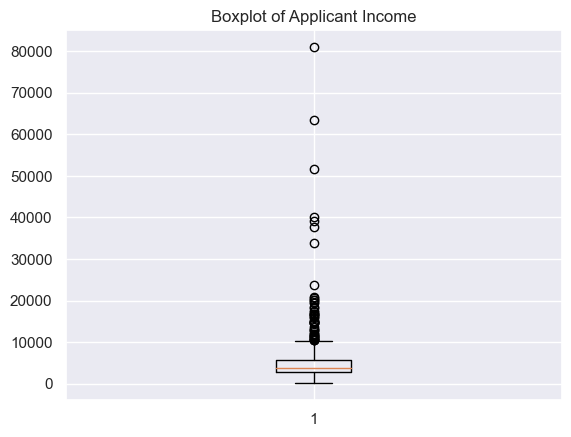

In [769]:
plt.boxplot(df['ApplicantIncome'])
plt.title("Boxplot of Applicant Income")
plt.show()

In [770]:
df[df['ApplicantIncome'] > 45000].head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [771]:
print(df.shape)
df  = df[df['ApplicantIncome'] < 45000]
print(df.shape)

(614, 12)
(611, 12)


➡️ Here Only three extreme data points were removed

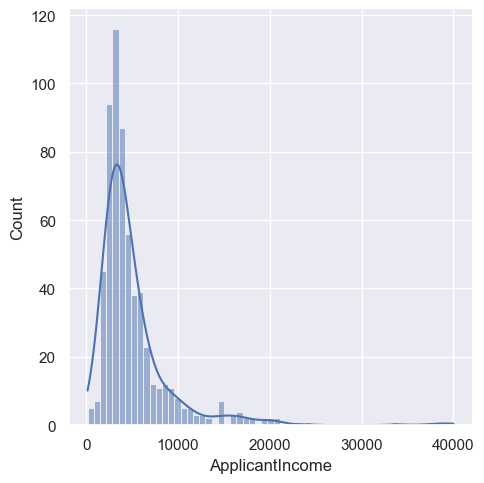

In [772]:
import warnings
warnings.filterwarnings("ignore")

sns.displot(df['ApplicantIncome'],kde=True)

### Transforming Data :
Transforming the applicant income data by taking the natural logarithm of each value and then visualizing the transformed data distribution using a box plot. This transformation is likely done to make the data distribution more symmetrical and easier to analyze statistically.

In [773]:
df['ApplicantIncome_transformed'] =np.log1p(df['ApplicantIncome'])

Text(0.5, 1.0, 'Boxplot of Applicant Income Transformed')

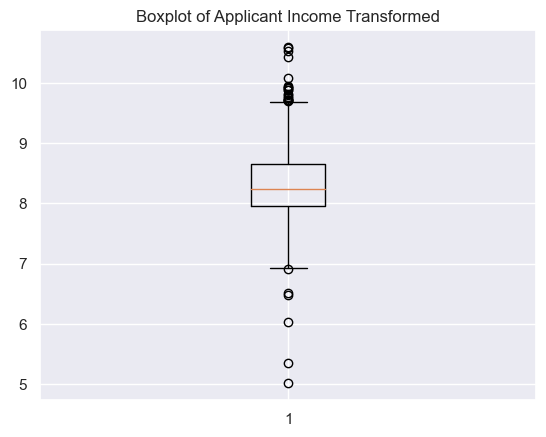

In [774]:
plt.boxplot(df['ApplicantIncome_transformed'])
plt.title("Boxplot of Applicant Income Transformed")

0.18579356377879477


Text(0.5, 1.0, 'Histogram of Applicant Income Transformed')

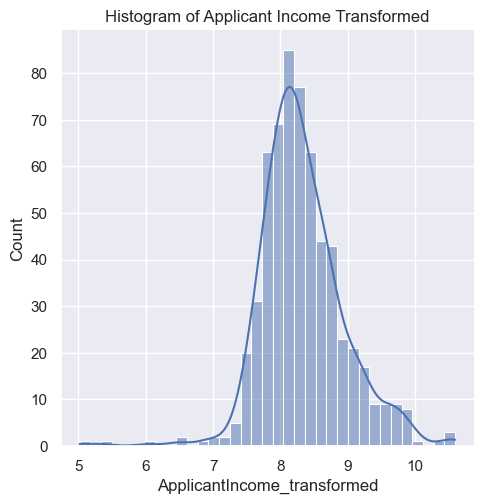

In [775]:
print(df['ApplicantIncome_transformed'].skew())
sns.displot(df['ApplicantIncome_transformed'],kde=True)
plt.title("Histogram of Applicant Income Transformed")

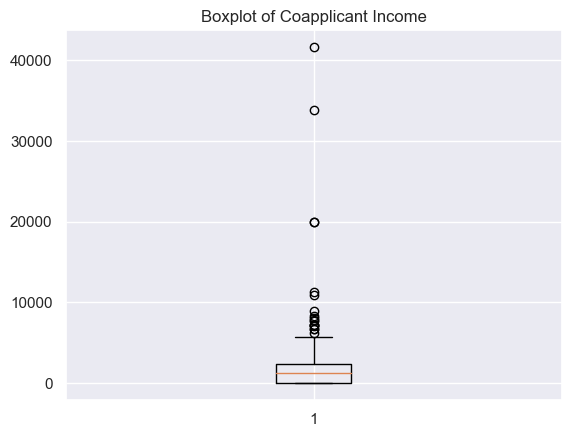

In [776]:
plt.boxplot(df['CoapplicantIncome'])
plt.title("Boxplot of Coapplicant Income")
plt.show()

In [777]:
df[df['CoapplicantIncome'] > 19000].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_transformed
402,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,7.824446
417,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,7.378384
581,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,7.515889
600,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N,6.033086


In [778]:
print(df.shape)
df = df[df['CoapplicantIncome'] < 19000]
print(df.shape)

(611, 13)
(607, 13)


1.6683488313704056


Text(0.5, 1.0, 'Histogram of Coapplicant Income')

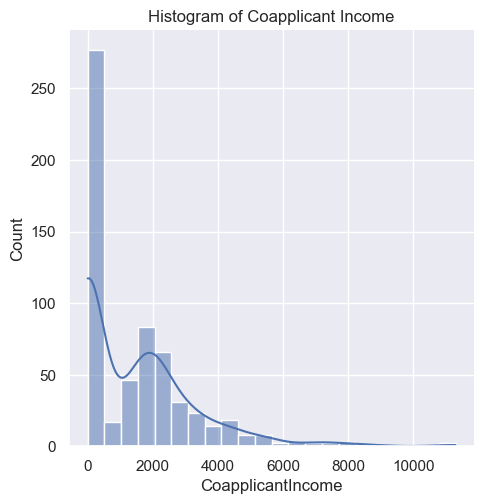

In [779]:
print(df['CoapplicantIncome'].skew())
sns.displot(df['CoapplicantIncome'],kde=True)
plt.title("Histogram of Coapplicant Income")

In [780]:
df['CoapplicantIncome_transformed'] =np.sqrt(df['CoapplicantIncome'])

Text(0.5, 1.0, 'Boxplot of Coapplicant Income Transformed')

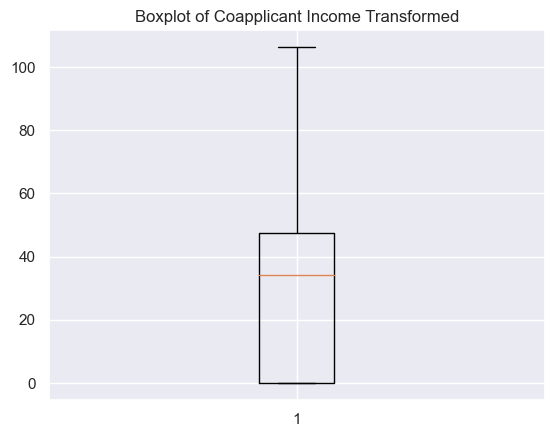

In [781]:
plt.boxplot(df['CoapplicantIncome_transformed'])
plt.title("Boxplot of Coapplicant Income Transformed")

0.30024681243565693


Text(0.5, 1.0, 'Histogram of Coapplicant Income Transformed')

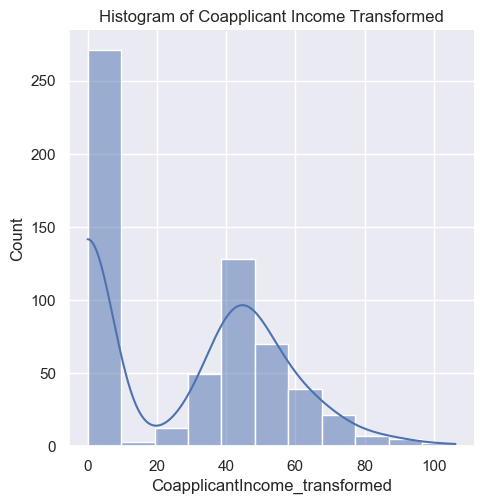

In [782]:
print(df['CoapplicantIncome_transformed'].skew())
sns.displot(df['CoapplicantIncome_transformed'],kde=True)
plt.title("Histogram of Coapplicant Income Transformed")

➡️ Transforming the coapplicant income data by taking the square root of each value and then visualizing the transformed data distribution using a box plot. This transformation is likely done to make the data distribution more symmetrical and easier to analyze statistically, similar to the logarithmic transformation used for the applicant income data.

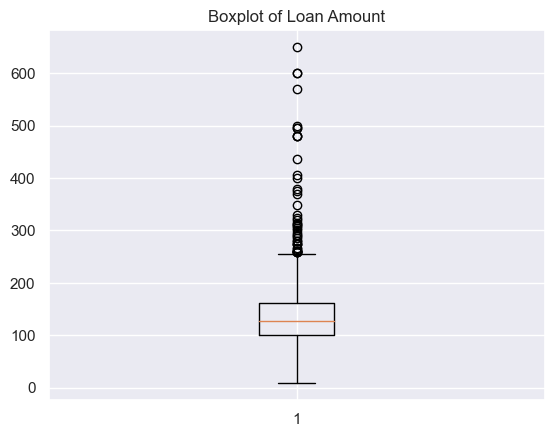

In [783]:
plt.boxplot(df['LoanAmount'])
plt.title("Boxplot of Loan Amount")
plt.show()

In [784]:
df[df['LoanAmount'] > 550].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_transformed,CoapplicantIncome_transformed
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y,9.911803,0.00000
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,10.596635,0.00000
369,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,9.889946,72.56721
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y,9.877400,0.00000


In [785]:
print(df.shape)
df = df[df['LoanAmount'] < 550]
print(df.shape)

(607, 14)
(603, 14)


2.026053055689584


Text(0.5, 1.0, 'Histogram of Loan Amount')

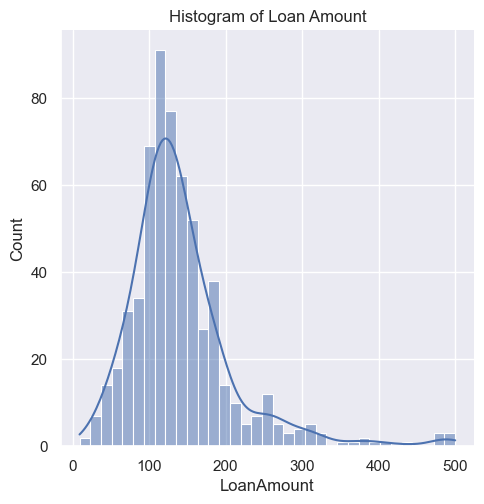

In [786]:
print(df['LoanAmount'].skew())
sns.displot(df['LoanAmount'],kde=True)
plt.title("Histogram of Loan Amount")

In [787]:
df['Loan_Amount_transformed'] =np.cbrt(df['LoanAmount'])

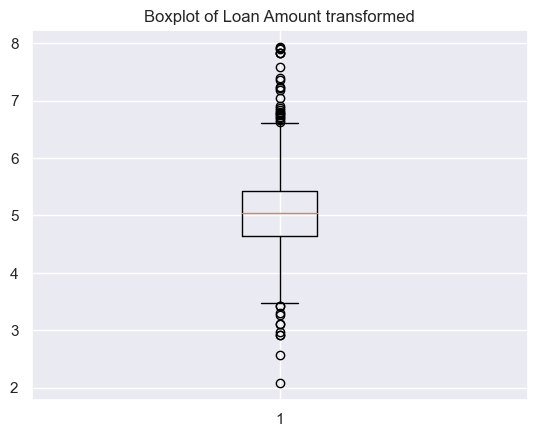

In [788]:
plt.boxplot(df['Loan_Amount_transformed'])
plt.title("Boxplot of Loan Amount transformed")
plt.show()

0.42565877508038275


Text(0.5, 1.0, 'Histogram of Loan Amount transformed')

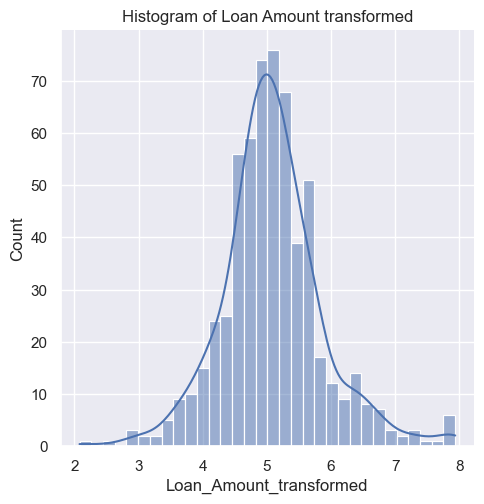

In [789]:
print(df['Loan_Amount_transformed'].skew())
sns.displot(df['Loan_Amount_transformed'],kde=True)
plt.title("Histogram of Loan Amount transformed")

In [790]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    520
180.0     41
480.0     14
300.0     12
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

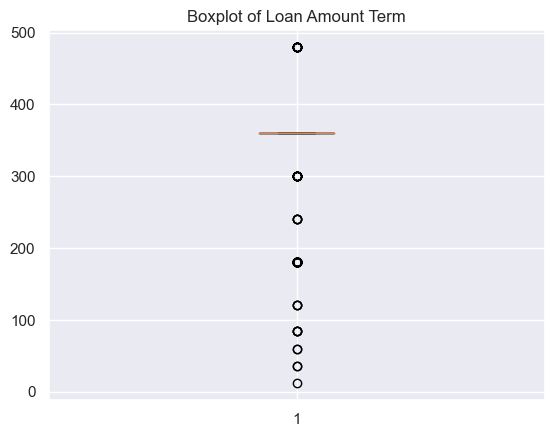

In [791]:
plt.boxplot(df['Loan_Amount_Term'])
plt.title("Boxplot of Loan Amount Term")
plt.show()

In [792]:
df[df['Loan_Amount_Term'] > 400]['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
480.0    14
Name: count, dtype: int64

In [793]:
df[df['Loan_Amount_Term'] < 350]['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
180.0    41
300.0    12
240.0     4
84.0      4
120.0     3
60.0      2
36.0      2
12.0      1
Name: count, dtype: int64

The loan term column has both extreme data points on the spectrum it is difficult to determine the outliers here.

-2.487137477498415


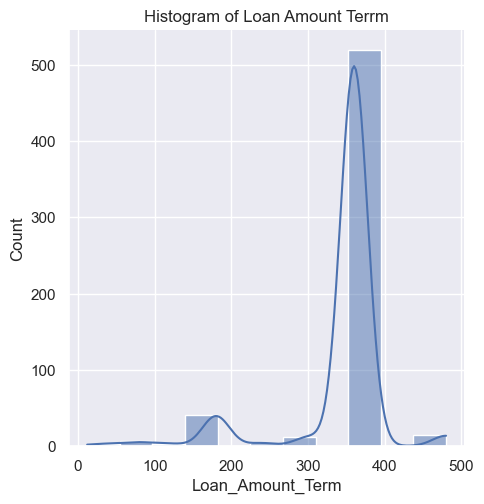

In [794]:
sns.displot(df['Loan_Amount_Term'],kde=True)
plt.title("Histogram of Loan Amount Terrm")
print(df['Loan_Amount_Term'].skew())

In [795]:
df['Loan_Amount_Term_Transformed'] = df['Loan_Amount_Term'] * df['Loan_Amount_Term'] * df['Loan_Amount_Term']

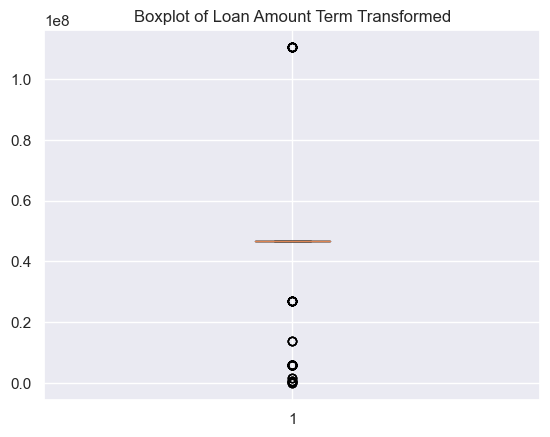

In [796]:
plt.boxplot(df['Loan_Amount_Term_Transformed'])
plt.title("Boxplot of Loan Amount Term Transformed")
plt.show()

0.31953595328220424


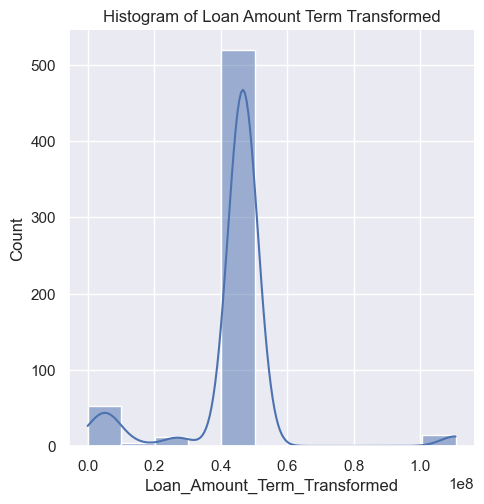

In [797]:
sns.displot(df['Loan_Amount_Term_Transformed'],kde=True)
plt.title("Histogram of Loan Amount Term Transformed")
print(df['Loan_Amount_Term_Transformed'].skew())

In [798]:
#transforming categorical variables into a form that could be provided by ML algorithms to do a better prediction.
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area'], dtype=int)
df.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_transformed,CoapplicantIncome_transformed,Loan_Amount_transformed,Loan_Amount_Term_Transformed,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,8.674197,0.000000,5.270588,46656000.0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,8.430327,38.832976,5.039684,46656000.0,...,1,0,0,1,0,1,0,1,0,0


In [799]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'ApplicantIncome_transformed', 'CoapplicantIncome_transformed',
       'Loan_Amount_transformed', 'Loan_Amount_Term_Transformed',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [800]:
from sklearn.preprocessing import StandardScaler

In [801]:
Scale = StandardScaler()

In [802]:
# saving this procewssed dataset
df.to_csv('Processed_Loan_Dataset.csv', index=None)

In [803]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_transformed,CoapplicantIncome_transformed,Loan_Amount_transformed,Loan_Amount_Term_Transformed,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,8.674197,0.000000,5.270588,46656000.0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,8.430327,38.832976,5.039684,46656000.0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,8.006701,0.000000,4.041240,46656000.0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,Y,7.857094,48.559242,4.932424,46656000.0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,Y,8.699681,0.000000,5.204828,46656000.0,...,0,0,0,1,0,1,0,0,0,1


### Data Partition
Dependent features (Loan_Status) will be seperated from independent features.

In [804]:
x = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

In [805]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome_transformed',
       'CoapplicantIncome_transformed', 'Loan_Amount_transformed',
       'Loan_Amount_Term_Transformed', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### SMOTE Technique
oversampling technique will be used to avoid overfitting,

In [806]:
df['Loan_Status'].value_counts()

Loan_Status
Y    416
N    187
Name: count, dtype: int64

In [807]:
x, y = SMOTE().fit_resample(x, y)

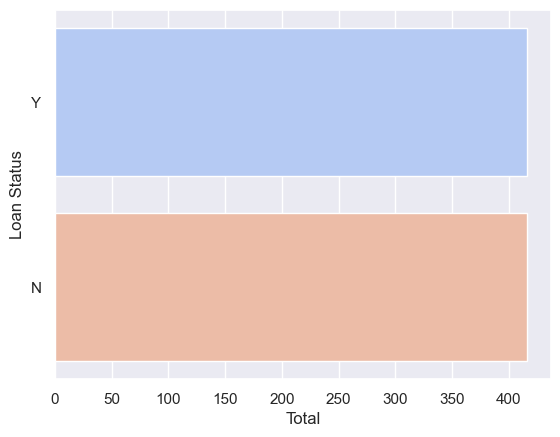

In [808]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

➡️ The distrubtion of Loan status are now balanced

In [809]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [810]:
x_scaled = Scale.fit_transform(x)

In [811]:
x_scaled

array([[ 0.20336927, -0.81213474,  0.08418759, ..., -0.58845418,
        -0.65165753,  1.58447105],
       [-0.11550857,  0.08633033, -0.19322098, ...,  1.69936767,
        -0.65165753, -0.63112545],
       [-0.5142318 , -0.81213474, -1.1273498 , ..., -0.58845418,
        -0.65165753,  1.58447105],
       ...,
       [-0.66737377, -0.81213474, -1.72515201, ..., -0.58845418,
        -0.65165753,  1.58447105],
       [ 0.97008659, -0.81213474,  1.64387834, ..., -0.58845418,
        -0.65165753, -0.63112545],
       [ 0.31570696,  3.79316759,  1.1522858 , ..., -0.58845418,
        -0.65165753, -0.63112545]])

In [812]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_transformed,CoapplicantIncome_transformed,Loan_Amount_transformed,Loan_Amount_Term_Transformed,Gender_Female,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,8.674197,0.000000,5.270588,46656000.0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,8.430327,38.832976,5.039684,46656000.0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,8.006701,0.000000,4.041240,46656000.0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,7.857094,48.559242,4.932424,46656000.0,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,8.699681,0.000000,5.204828,46656000.0,0,...,0,0,0,1,0,1,0,0,0,1


In [813]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,832.0,5.041589e+03,3.972561e+03,150.000000,2.892750e+03,3.772500e+03,5.754500e+03,3.914700e+04
CoapplicantIncome,832.0,1.363102e+03,1.679428e+03,0.000000,0.000000e+00,1.019797e+03,2.173000e+03,1.130000e+04
LoanAmount,832.0,1.408245e+02,6.641192e+01,9.000000,1.031156e+02,1.280000e+02,1.607444e+02,5.000000e+02
Loan_Amount_Term,832.0,3.458733e+02,6.458934e+01,12.000000,3.600000e+02,3.600000e+02,3.600000e+02,4.800000e+02
Credit_History,832.0,7.632710e-01,3.945351e-01,0.000000,5.659756e-01,1.000000e+00,1.000000e+00,1.000000e+00
ApplicantIncome_transformed,832.0,8.333338e+00,5.869975e-01,5.017280,7.970308e+00,8.234696e+00,8.657908e+00,1.057510e+01
CoapplicantIncome_transformed,832.0,2.599484e+01,2.607522e+01,0.000000,0.000000e+00,3.148638e+01,4.661536e+01,1.063015e+02
Loan_Amount_transformed,832.0,5.085328e+00,7.572540e-01,2.080084,4.680412e+00,5.039684e+00,5.431657e+00,7.937005e+00
Loan_Amount_Term_Transformed,832.0,4.510619e+07,1.795077e+07,1728.000000,4.665600e+07,4.665600e+07,4.665600e+07,1.105920e+08
Gender_Female,832.0,1.478365e-01,3.551514e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [814]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [815]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((665, 24), (167, 24), (665,), (167,))

In [816]:
# scale the data using min-max scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [817]:
# Fit-transform on train data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# MODELs

In [818]:
#Logistic Regression

In [819]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(x_train_scaled, y_train)

In [820]:
# Predict the loan eligibility on testing set and calculate its accuracy.
# First, from sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

ypred = lrmodel.predict(x_test_scaled)

LR= accuracy_score(ypred, y_test)

In [821]:
print(LR)

0.8682634730538922


In [822]:
ypred

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N'],
      dtype=object)

In [823]:
# Print the confusion matrix
confusion_matrix(y_test, ypred)

array([[56, 22],
       [ 0, 89]], dtype=int64)

In [824]:
# to check how probabilities are assigned
pypred = lrmodel.predict_proba(x_test_scaled)
pypred

array([[9.55483828e-01, 4.45161721e-02],
       [1.00371302e-01, 8.99628698e-01],
       [2.80158865e-01, 7.19841135e-01],
       [2.38715280e-01, 7.61284720e-01],
       [3.20310911e-01, 6.79689089e-01],
       [1.69434043e-01, 8.30565957e-01],
       [2.60979634e-01, 7.39020366e-01],
       [9.73072688e-01, 2.69273118e-02],
       [1.63371307e-01, 8.36628693e-01],
       [3.69128755e-01, 6.30871245e-01],
       [2.07921414e-01, 7.92078586e-01],
       [3.95515251e-01, 6.04484749e-01],
       [2.90481137e-01, 7.09518863e-01],
       [9.91945472e-01, 8.05452824e-03],
       [9.20217214e-01, 7.97827858e-02],
       [3.50996322e-01, 6.49003678e-01],
       [3.97451102e-01, 6.02548898e-01],
       [1.22145121e-01, 8.77854879e-01],
       [9.88181815e-01, 1.18181848e-02],
       [9.61851718e-01, 3.81482818e-02],
       [9.00094528e-01, 9.99054720e-02],
       [9.09864147e-01, 9.01358528e-02],
       [2.46709188e-01, 7.53290812e-01],
       [2.31487566e-01, 7.68512434e-01],
       [3.116239

In [825]:
# to change the default threshold and to make it 70% and above
(pypred[:, 1] >= 0.7).astype(int)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [826]:
#K-Nearest Neighbour (KNN)

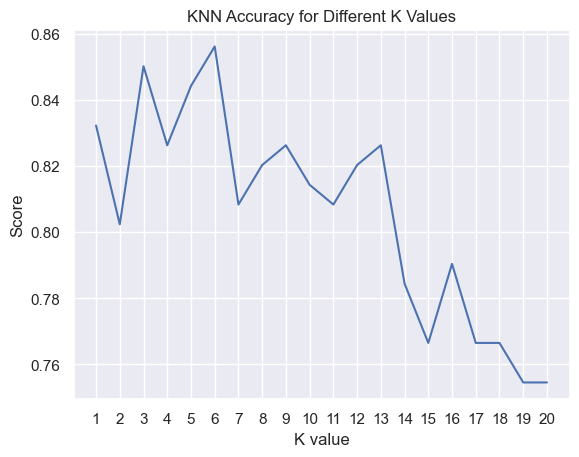

KNN best accuracy: 85.63% (K = 6)


In [827]:

# Train the k-NN classifier with different values of k
score_list_knn = []
for i in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(x_train_scaled, y_train)
    score_list_knn.append(knn_classifier.score(x_test_scaled, y_test))

# Plot the scores for different values of k
plt.plot(range(1, 21), score_list_knn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("KNN Accuracy for Different K Values")
plt.show()

# Find the best accuracy and corresponding k value
best_accuracy_k = max(score_list_knn)
best_k = score_list_knn.index(best_accuracy_k) + 1
print("KNN best accuracy: {:.2f}% (K = {})".format(best_accuracy_k * 100, best_k))

# Decision Tree
![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*HXQJ8Eb8vNuxzprfKObodQ.gif)

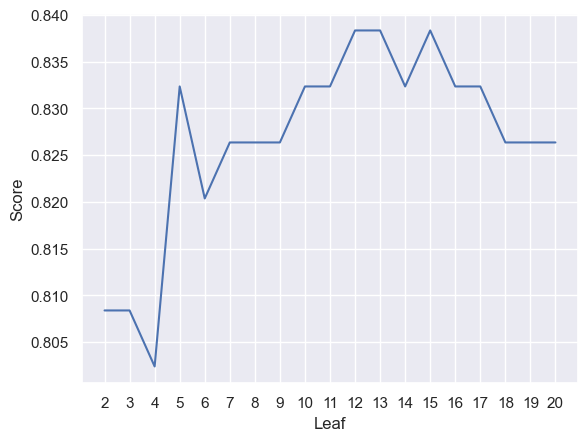

Decision Tree Accuracy: 83.83%


In [828]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Random Forest :
![](https://upload.wikimedia.org/wikipedia/commons/c/c7/Randomforests_ensemble.gif)

In [829]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [830]:
# Let's list the tunable hyperparameters for Random Forest algorithm
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [831]:
rfmodel = RandomForestClassifier(n_estimators=100, 
                                 min_samples_leaf=5, 
                                 max_features='sqrt')
rfmodel.fit(x_train, y_train)

# predict on xtest
ypred = rfmodel.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(ypred, y_test),'\n')
print(confusion_matrix(y_test, ypred))

0.8682634730538922 

[[58 20]
 [ 2 87]]


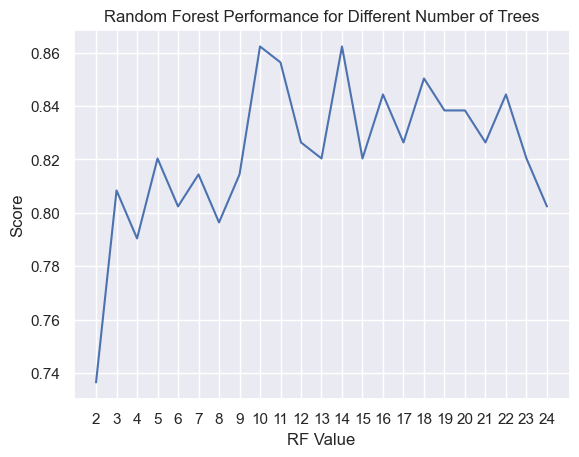

Random Forest Accuracy:  86.23%


In [832]:
scoreListRF = []
for i in range(2, 25):
    rfmodel = RandomForestClassifier(n_estimators=i, 
                                      min_samples_leaf=5, 
                                      max_features='sqrt')
    rfmodel.fit(x_train, y_train)
    ypred = rfmodel.predict(x_test)
    scoreListRF.append(accuracy_score(y_test, ypred))

# Plotting
plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.title("Random Forest Performance for Different Number of Trees")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

### Model Comparison

In [833]:
# import rquired libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# if you have a imbalanced dataset, you can use stratifiedKFold
from sklearn.model_selection import StratifiedKFold

In [834]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'Decision Tree', 'Random Forest',], 
                        'Accuracy': [LR*100, best_accuracy_k*100, DTAcc*100, 
                                     RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,86.826347
3,Random Forest,86.227545
1,K Neighbors,85.628743
2,Decision Tree,83.832335


➡️ In general, it can be seen that all models giving up to 80% accuracy.
➡️ The highest accuracy is 86%%.
